Basic concept is to do linear regression but just to apply a sigmoid function to it to make the best fit line look like a 'S' character to get more accuracy.¶
y = mx + b and then the value of y is passed to z = 1/1+e.pow(-y)

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

To feed images to neurons we have to convert to image into matrix, suppose we have a picture of '2' with black background, so the image will be converted into a matrix based on the color rgb numbers ie. black=0 & white = 255 and then the 2d arrays will be converted or flattened to make it a list containing elements and the n number of elements we will have n number of neurons 

In [7]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

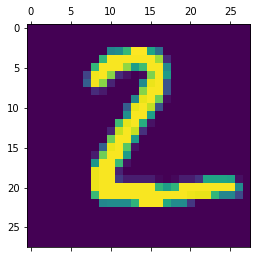

In [15]:
plt.matshow(X_test[1])

In [18]:
y_test[2]

1

Next make sure to see the shape of X_train and X_test because later when we will want to flatten these we will need the shape of it ie. in this case it's 28 * 28.

In [22]:
X_train.shape # first dimension = 6000 samples, second dimension = 28 & 28 each individual image

(60000, 28, 28)

Next we are going to scale the data, you can ignore this at first and jump to training your model and you will notice that your model is not very accurate. That's when we need to scale our data which is a little trick to make the model accurate.

In [32]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

Now we are going to flatten the image, in deep learning you will basically come across this term a lot, flattening the data means converting the 2d array into 1d array to give it to neurons, in this case there will be 784 input neurons as the shape of our 2d arrays are 28,28. So 28 * 28 = 784, ie., 784 input_neurons

In [33]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [34]:
X_train_flattened.shape

(60000, 784)

In [35]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [36]:
y_train.shape

(60000,)

In [37]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

At this point after scaling and flattening our image we are ready to create our model and train it with training data and test it with testing datas. We are using "Sequential" class this time. "keras.layers.Dense" is to create input and output neurons basically, here we are creating 10 output neurons and 784 input neurons which is the shape of our X_train data after flattening it. We are using "sigmoid" function which creates a "S" like best fit one which is more accurate than the regular best fit line of Regression. Compiling the model we used three params here ie., optimizer, loss, and metrics, feel free to read docs as their are a lot of different options for this, and next with fit function we are training our model by giving it our X_train_flattened data and y_train

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4886 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.2854 - accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2747 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.2682 - accuracy: 0.9258


Before testing our model or deploying it we evaluate it with some sort of testing data set.

In [42]:
# Before deploying always evaluate it on a test data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 666us/step - loss: 0.2668 - accuracy: 0.9262


[0.26678553223609924, 0.9261999726295471]

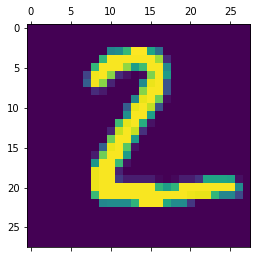

In [52]:
plt.matshow(X_test[1])

In [53]:
y_predicted = model.predict(X_test_flattened)

In [54]:
y_predicted[0]

array([1.2456010e-05, 1.4518486e-10, 5.0169390e-05, 8.6044371e-03,
       9.7918428e-07, 7.3248470e-05, 1.2071776e-09, 7.4953628e-01,
       6.3779298e-05, 9.6544623e-04], dtype=float32)

As you can see above the first element in y_predicted is kind of messed up so to find the max value in that array we will see numpy's argmax function and it gave us 2, as you can see above the '1th' element in X_test is also plotted as 2, which means our model guessed correctly.

In [56]:
np.argmax(y_predicted[1])

2

In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [60]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [64]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    3,    5,    4,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  927,   16,    8,    3,   13,   11,   34,    4],
       [   4,    0,   21,  927,    0,   17,    2,   12,   20,    7],
       [   2,    2,    2,    1,  914,    0,   12,    4,    7,   38],
       [  12,    3,    3,   40,   10,  757,   18,    8,   34,    7],
       [  12,    3,    6,    1,    7,    9,  917,    2,    1,    0],
       [   1,    6,   25,    3,    4,    0,    0,  955,    1,   33],
       [  10,    8,    7,   19,    9,   19,   10,   14,  869,    9],
       [  11,    7,    1,   10,   24,    6,    0,   26,    5,  919]])>

<AxesSubplot:>

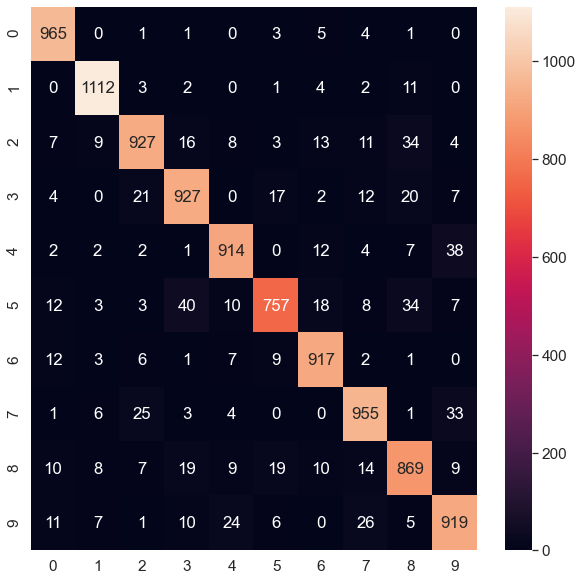

In [71]:
import seaborn as sn
import pandas as pd
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d') # font size

Now let's add a hidden layer to increase our performace more. As you can see we created a hidden layer and gave it 100 output neurons which will increase our accuracy further more. Make sure to remove the input_shape from the previous "keras.Dense" function.

In [73]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4318 - accuracy: 0.8941
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2005 - accuracy: 0.9436
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1527 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1232 - accuracy: 0.9646
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1018 - accuracy: 0.9713


In [81]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.9682


[0.10967665165662766, 0.9682000279426575]

As you can see keras comes with a lot of apis to make deep learning easy for beginners. Remeber how we had to flatten our data before passing it to our "Sequential" model. We can do the same thing while creating model with "keras.layers.Flatten" function and passing it the input_size of 28,28 ie., which if you remember was the dimension of each image and we used "reshape" function of pandas to multiple it and make it an 1d array of 784 elements. This time we just need to pass 28,28 and remove the input_size from the Dense function as it can figure out the size by itself now that we have given the dimension of the images.

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.8924
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1997 - accuracy: 0.9429
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1504 - accuracy: 0.9573
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9651
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0996 - accuracy: 0.9715
